In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from models import *
from plot_utils import *

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6.5)
plt.rcParams['font.size'] = 33
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 33
plt.rcParams['xtick.labelsize'] = 33
plt.rcParams['ytick.labelsize'] = 33
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['lines.markersize'] = 14
plt.rcParams['lines.linewidth'] = 6

sns.set_style('ticks')
sns.set_palette('Paired', 10)

In [2]:
rmse_df = pd.read_csv('rmse.csv')

simdex_netflix_df = pd.read_csv('timing-results/netflix-simdex-timing.csv')
lemp_netflix_df = pd.read_csv('timing-results/netflix-lemp-timing.csv')
fexipro_netflix_df = pd.read_csv('timing-results/netflix-fexipro-timing.csv')
blocked_mm_netflix_df = pd.read_csv('timing-results/netflix-blocked_mm-timing.csv')

simdex_kdd_df = pd.read_csv('timing-results/old/kdd-simdex-timing.csv')
lemp_kdd_df = pd.read_csv('timing-results/kdd-lemp-timing.csv')
fexipro_kdd_df = pd.read_csv('timing-results/kdd-fexipro-timing.csv')
blocked_mm_kdd_df = pd.read_csv('timing-results/old/kdd-blocked_mm-timing.csv')

simdex_r2_df = pd.read_csv('timing-results/old/r2-simdex-timing.csv')
lemp_r2_df = pd.read_csv('timing-results/r2-lemp-timing.csv')
fexipro_r2_df = pd.read_csv('timing-results/r2-fexipro-timing.csv')
blocked_mm_r2_df = pd.read_csv('timing-results/old/r2-blocked_mm-timing.csv')


simdex_df = pd.concat([simdex_netflix_df, simdex_kdd_df, simdex_r2_df])
lemp_df = pd.concat([lemp_netflix_df, lemp_kdd_df, lemp_r2_df])
fexipro_df = pd.concat([fexipro_netflix_df, fexipro_kdd_df, fexipro_r2_df])
blocked_mm_df = pd.concat([blocked_mm_netflix_df, blocked_mm_kdd_df, blocked_mm_r2_df])

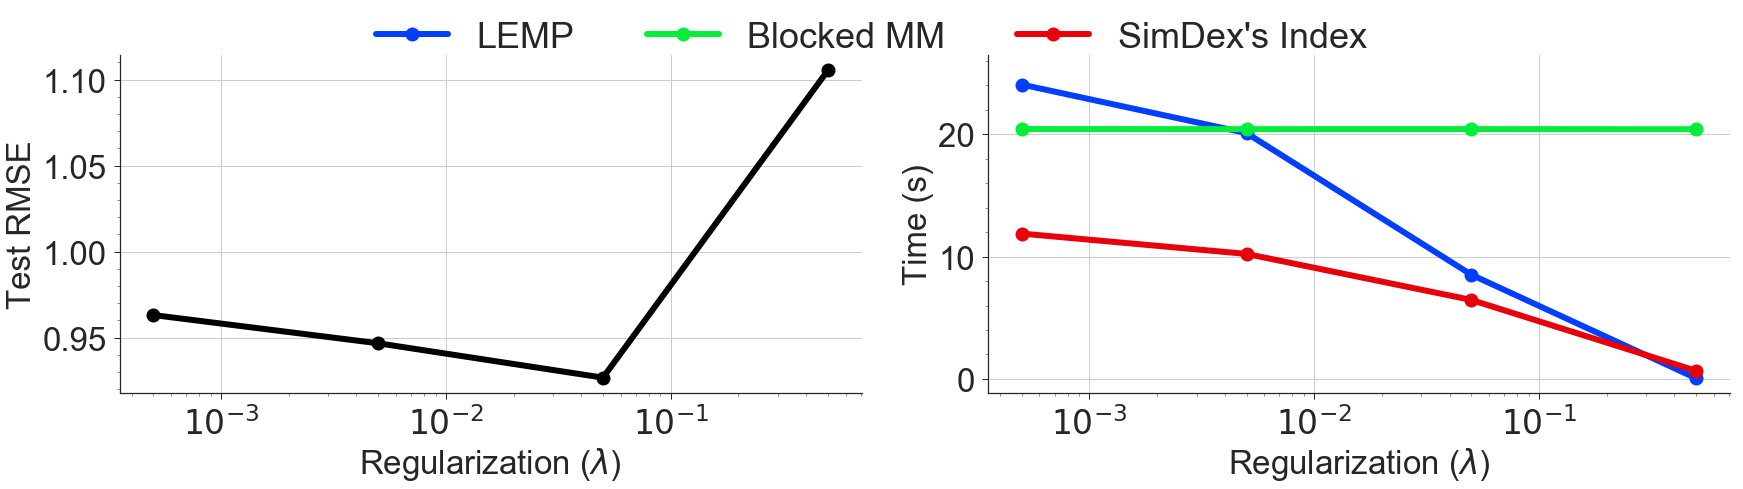

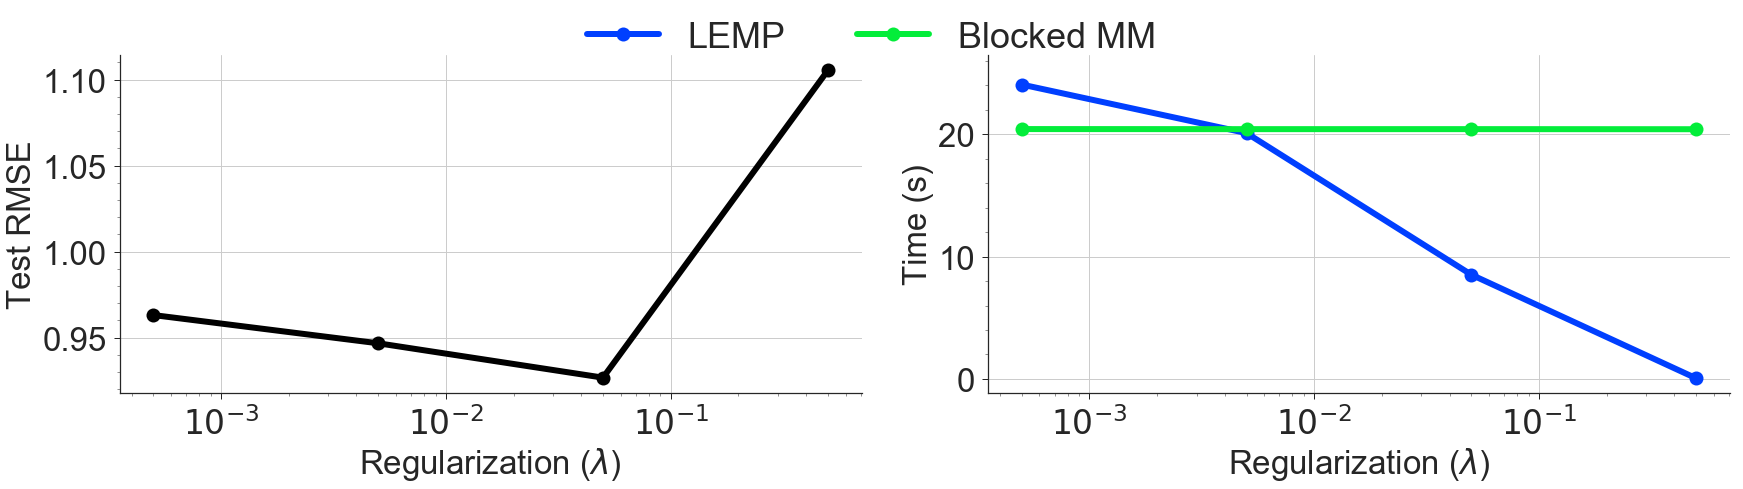

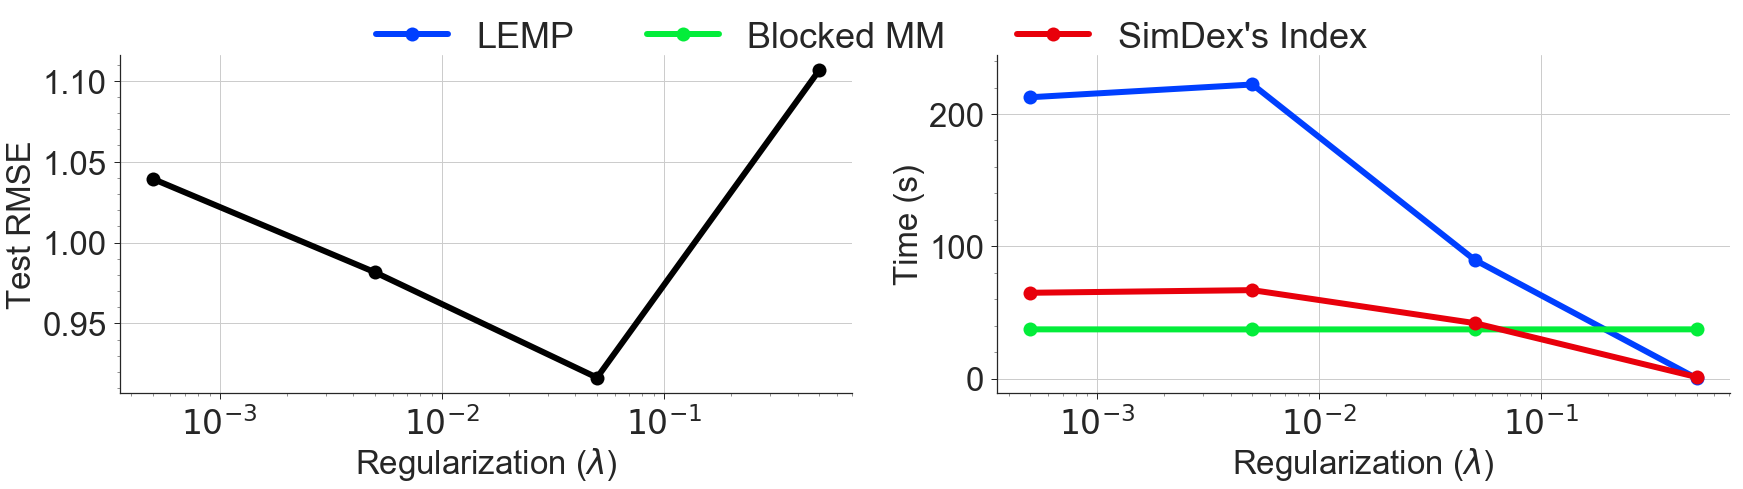

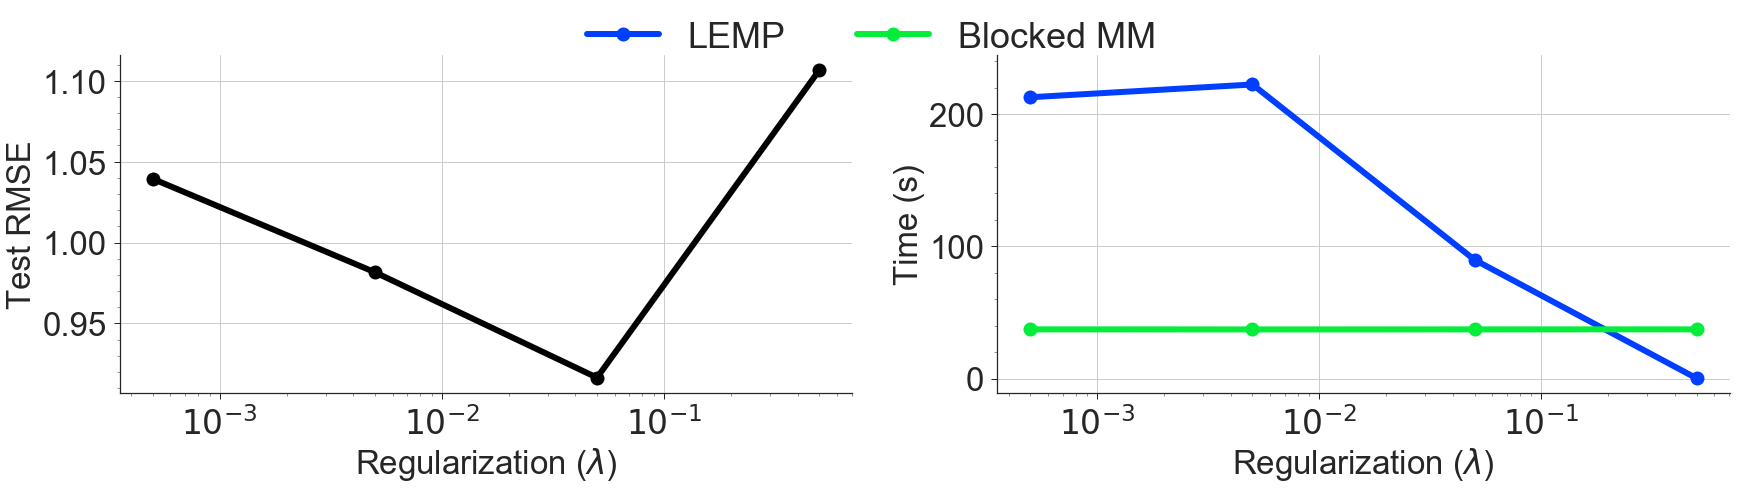

In [3]:
sns.set_palette('bright', 4)
for model_prefix, fname, title_suffix in [('nomad-Netflix-10', 'appetizer%s-a', '$F=10$'),
                                          ('nomad-Netflix-50', 'appetizer%s-b', '$F=50$')]:
    for add_simdex in ['', '-no-simdex']:
        simdex_df = simdex_netflix_df if add_simdex == '' else None
        rmse_and_reg_plots(blocked_mm_netflix_df, lemp_netflix_df, rmse_df,
                       model_prefix, NETFLIX_REGS, simdex_df=simdex_df, fname=fname % add_simdex, 
                           figsize=(25, 7), bbox_to_anchor=(0,0,1,1.05), title='',
                           y_title=1.09)
sns.set_palette('Paired', 10)

In [ ]:
f_u_plots(simdex_df, lemp_df, fexipro_df, blocked_mm_df, GOLD_STANDARD_MODELS, y_title=-0.7)

In [ ]:
simdex_netflix_df.sort_values(by='comp_time').groupby(
        ['model', 'K'], as_index=False).first().drop(['num_threads','num_latent_factors',
                                                     'num_bins','sample_percentage',
                                                      'num_iters', 'parse_time'], axis=1)

In [ ]:
for model in NETFLIX_MODELS:
    num_clusters_vs_runtime_single(simdex_netflix_df, model,
                            figsize=(25, 5.5), y_title=-0.4,
                            bbox_to_anchor=(1,1.05), filter_value=8192)
#     batch_size_vs_runtime_single(simdex_netflix_df, model,
#                             figsize=(25, 5.5), y_title=-0.4,
#                             bbox_to_anchor=(1,1.05))


In [ ]:
for model in ['lemp-paper-KDD-50']:
    num_clusters_vs_runtime_single(armadillo_simdex_kdd_df, model,
                            figsize=(25, 5.5), y_title=-0.25,
                            bbox_to_anchor=(1,1.05), filter_value=8192)
    batch_size_vs_runtime_single(armadillo_simdex_kdd_df, model,
                            figsize=(25, 5.5), y_title=-0.25,
                            bbox_to_anchor=(1,1.05))


In [ ]:
num_clusters_vs_runtime(simdex_netflix_df, ['lemp-paper-Netflix-50',
                                            'nomad-Netflix-50-reg-0.05',
                                            'lemp-paper-Netflix-noav-100',
                                            'nomad-Netflix-100-gold-standard',
                                            ],
                        figsize=(25, 5.5), y_title=-0.4,
                        bbox_to_anchor=(0,0,1,1.05), filter_value=4096)

In [ ]:
batch_size_vs_runtime(simdex_netflix_nomad_df, NOMAD_NETFLIX_GOLD_STANDARD_MODELS,
                      figsize=(25, 5.5), bbox_to_anchor=(0, 0, 1, 1.05), y_title=-0.4)

In [ ]:
batch_size_vs_runtime(simdex_netflix_df, LEMP_NETFLIX_MODELS,
                      figsize=(25, 5.5), bbox_to_anchor=(0, 0, 1, 1.05), y_title=-0.4)

In [ ]:
decision_rule(simdex_netflix_df, blocked_mm_netflix_df, NETFLIX_GOLD_STANDARD_MODELS, 1,
              x_line=17770*0.15, y_line=0.75, column='num_items_visited', csv_dir='user-stats/K-1',
              xlabel='# items visited', fname='netflix-items-visited-k-1', title='Netflix Models, K=1')

In [ ]:
decision_rule(simdex_kdd_df, blocked_mm_kdd_df, KDD_GOLD_STANDARD_MODELS, 1, x_line=624961*0.15, y_line=0.75,
              column='num_items_visited', csv_dir='user-stats/K-1', xlabel='# items visited', log=True,
              fname='kdd-items-visited-k-1', title='KDD Models, K=1')

In [ ]:
decision_rule(simdex_r2_df, blocked_mm_r2_df, R2_GOLD_STANDARD_MODELS, 1, x_line=136736*0.15, y_line=0.75,
              column='num_items_visited', csv_dir='user-stats/K-1', xlabel='# items visited', log=True,
              fname='r2-items-visited-k-1', title='R2 Models, K=1')

In [ ]:
reg_vs_runtime(simdex_netflix_df, blocked_mm_netflix_df,
               ['nomad-Netflix-10', 'nomad-Netflix-25', 'nomad-Netflix-50', 'nomad-Netflix-100'],
               NETFLIX_REGS, fname='Netflix', nrows=1, figsize=(34, 6.5), y_title=-0.27)

In [ ]:
models = ['nomad-R2-10', 'nomad-R2-25', 'nomad-R2-50', 'nomad-R2-100']
for model in models:
    rmse_and_reg_plots(simdex_r2_df, blocked_mm_r2_df, lemp_r2_df, rmse_df,
                   model, R2_REGS, figsize=(28, 8), y_title=-0.27)
# reg_vs_runtime(simdex_r2_df, blocked_mm_r2_df,
#                ['nomad-R2-10', 'nomad-R2-25', 'nomad-R2-50', 'nomad-R2-100'], R2_REGS, fname='R2', nrows=1,
#                figsize=(34, 6.5), y_title=-0.27)

In [ ]:
point_query_time(GOLD_STANDARD_MODELS, figsize=(32, 6.5), y_title=-0.4)

In [ ]:
dataset_size_vs_runtime(simdex_interpolation_df, lemp_interpolation_df, blocked_mm_interpolation_df, 'users')
dataset_size_vs_runtime(simdex_interpolation_df, lemp_interpolation_df, blocked_mm_interpolation_df, 'items')